In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Постановка задачи
Задача страхового скоринга: https://www.kaggle.com/c/prudential-life-insurance-assessment

Требуется провести классификацию клиентов по уровню благонадежности для страхования жизни (всего 8 градаций) - Response. Для оценки доступно несколько параметров: виды страховки (Product_Info), возраст (Ins_Age), рост (Ht), вес (Wt), индекс массы тела (BMI), данные о работе (Employment_Info), данные страховки (InsuredInfo), история страхования (Insurance_History), семья (Family_Hist), медицинские данные (Medical_History) и медицинские термины (Medical_Keyword) - всего 126 переменных.

Загрузим данные и исследуем их. Найдем возможные "утечки" и взаимосвязи параметров для построения моделей.

Данные:
* https://video.ittensive.com/machine-learning/prudential/train.csv.gz

© ITtensive, 2020

In [38]:
train = pd.read_csv("https://video.ittensive.com/machine-learning/prudential/train.csv.gz")

In [39]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


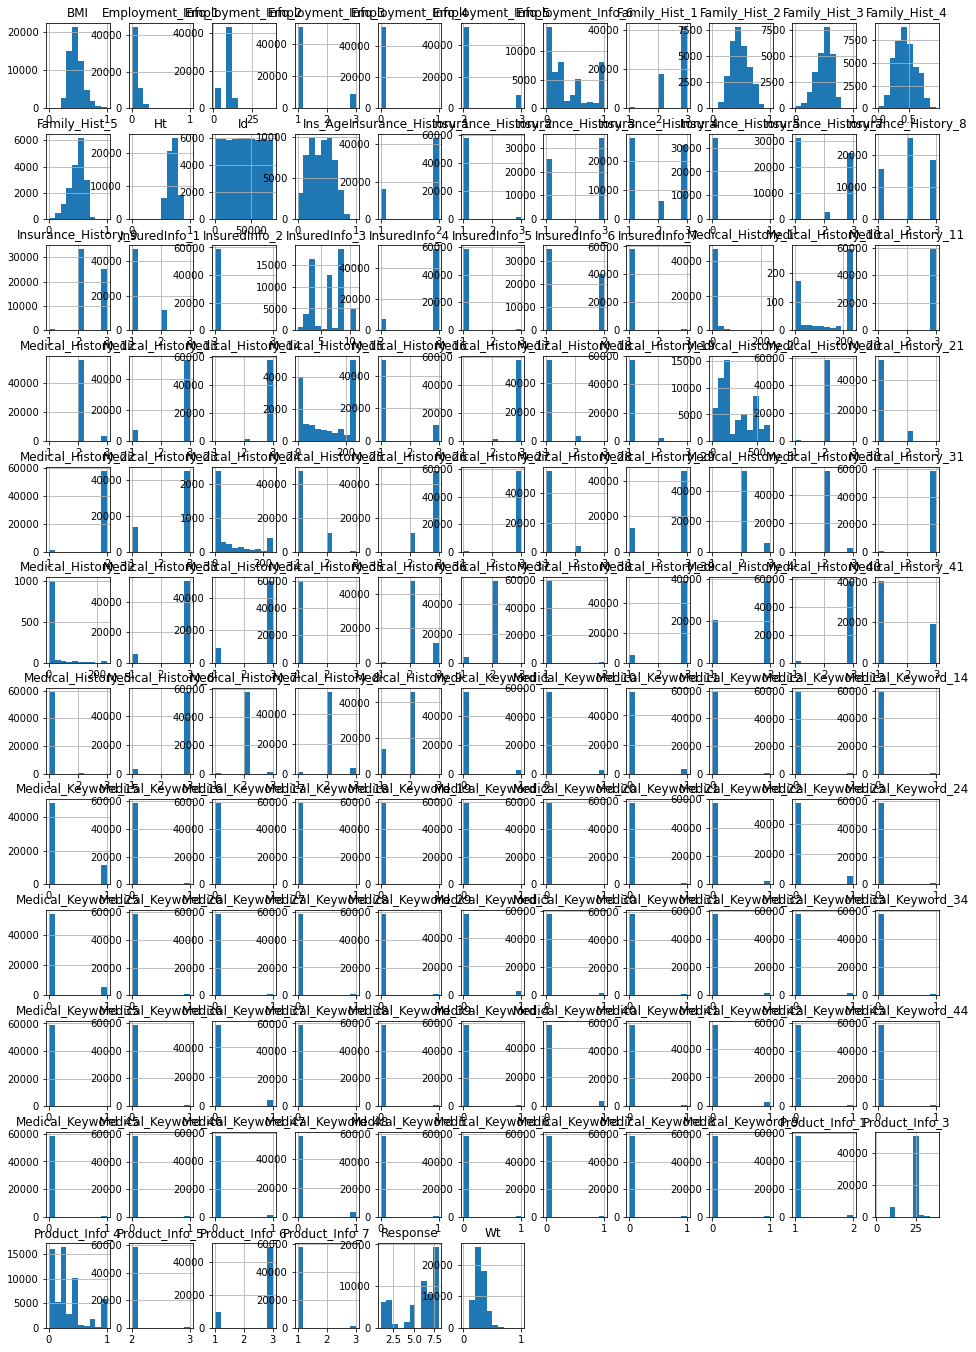

In [6]:
train.hist(figsize=(16,24));

'333'

In [14]:
def data_correlation_plot(df,columns):
    rows = np.ceil(len(columns) / 4)
    fig = plt.figure(figsize=(12,rows * 3))
    i = 1
    for column in columns:
        type_ = str(df[column].dtypes)
        if type_[0:3] == 'int' or type_[0:5] == 'float':
            area = fig.add_subplot(rows,4,i)
            pd.DataFrame(df,columns=['Response',column]).plot.scatter(x=column,y='Response',ax=area)
        i += 1

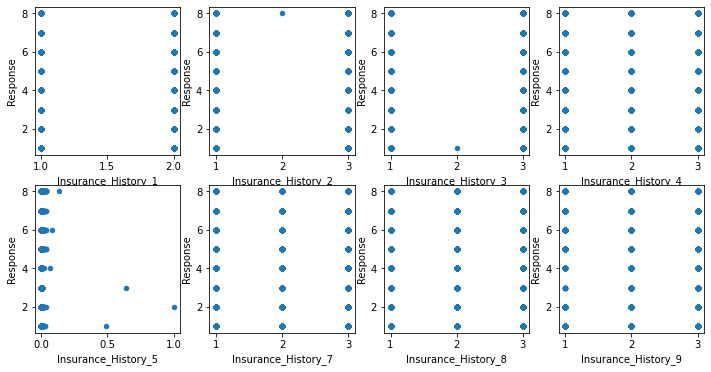

In [16]:
data_correlation_plot(train,train.columns[train.columns.str.startswith('Insurance_History')])

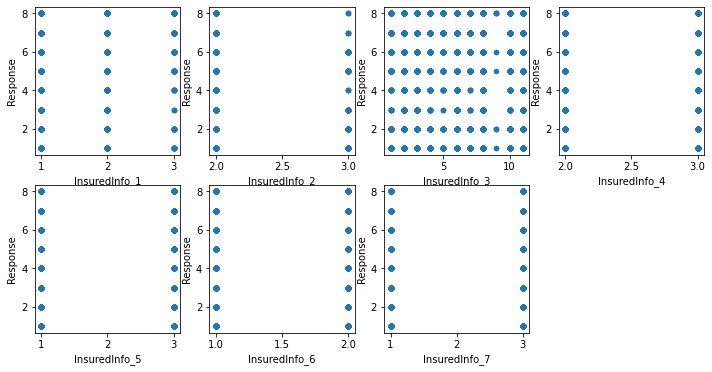

In [17]:
data_correlation_plot(train,train.columns[train.columns.str.startswith('InsuredInfo')])

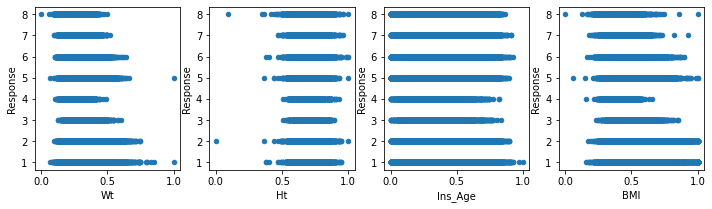

In [18]:
data_correlation_plot(train,['Wt','Ht','Ins_Age','BMI']) 

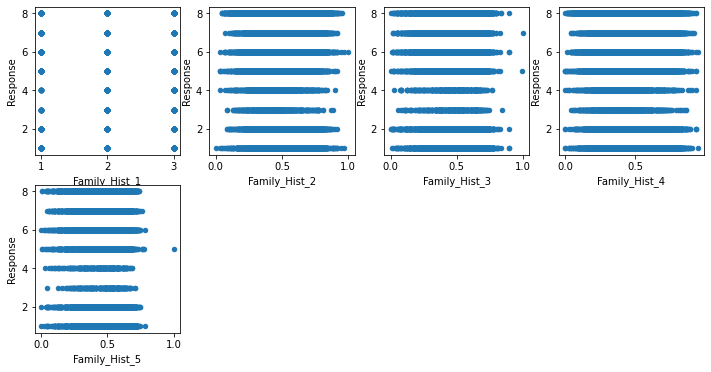

In [19]:
data_correlation_plot(train,train.columns[train.columns.str.startswith('Family_Hist')])

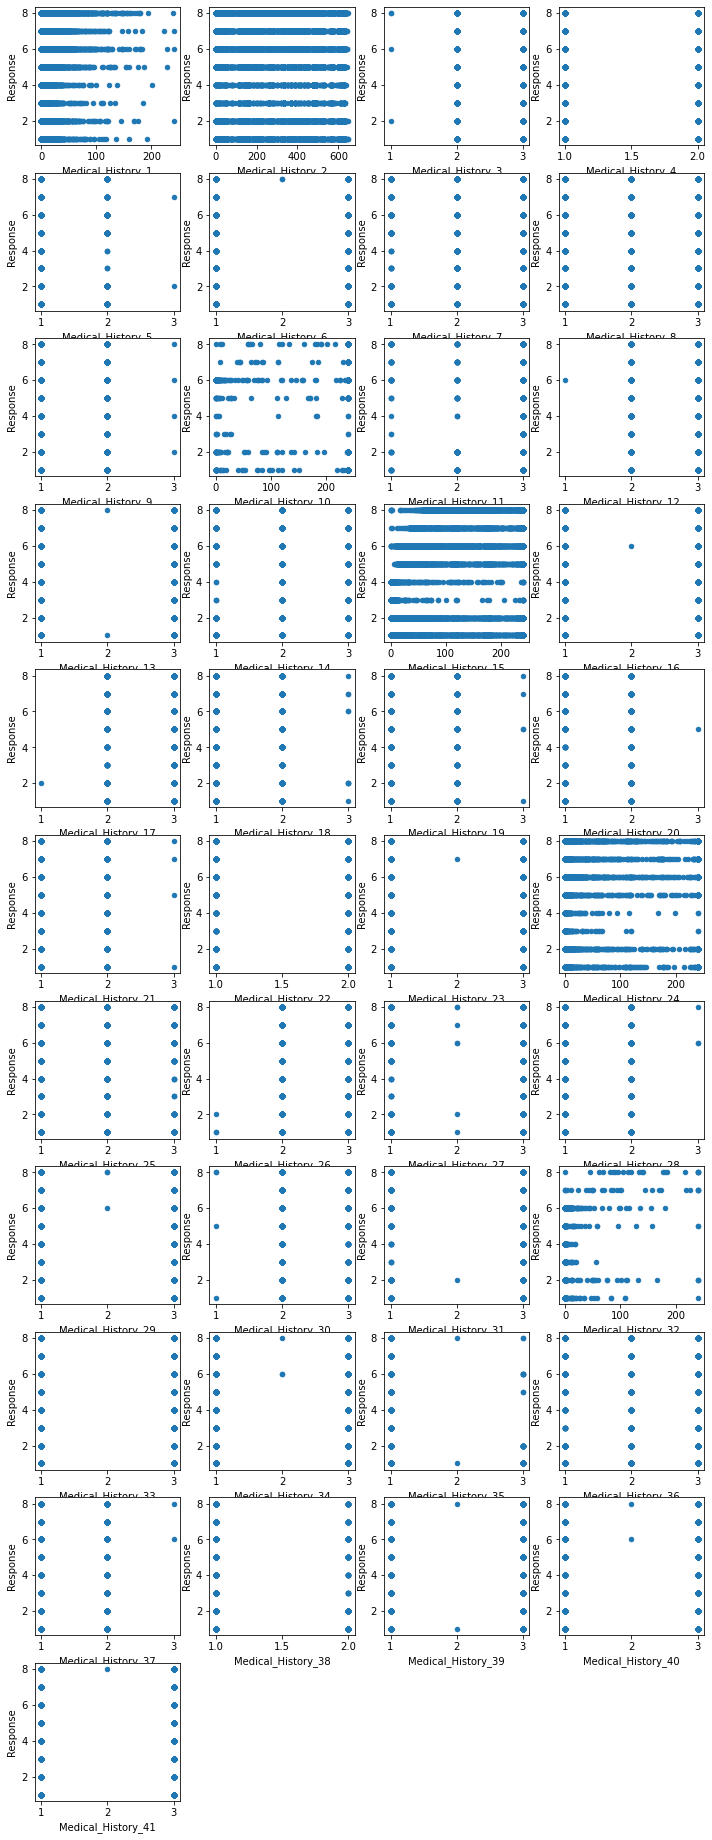

In [20]:
data_correlation_plot(train,train.columns[train.columns.str.startswith('Medical_History')])

In [40]:
train['Product_Info_2_1'] = train['Product_Info_2'].str.slice(0,1)
train['Product_Info_2_2'] = train['Product_Info_2'].str.slice(1,2).astype('int8')
train.drop('Product_Info_2',axis=1,inplace=True)

In [41]:
train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48', 'Response', 'Product_Info_2_1',
       'Product_Info_2_2'],
      dtype='object', length=129)

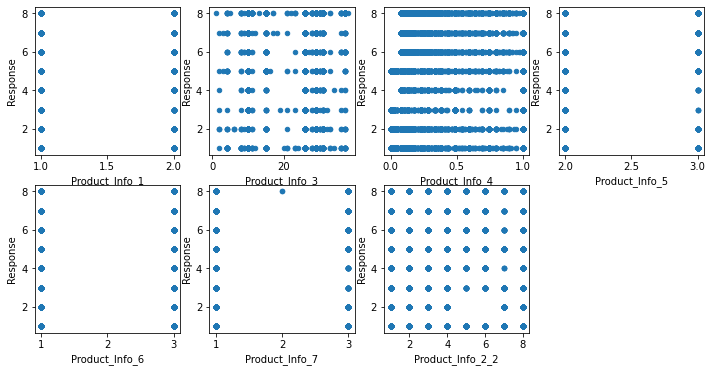

In [42]:
data_correlation_plot(train,train.columns[train.columns.str.startswith('Product_Info')])

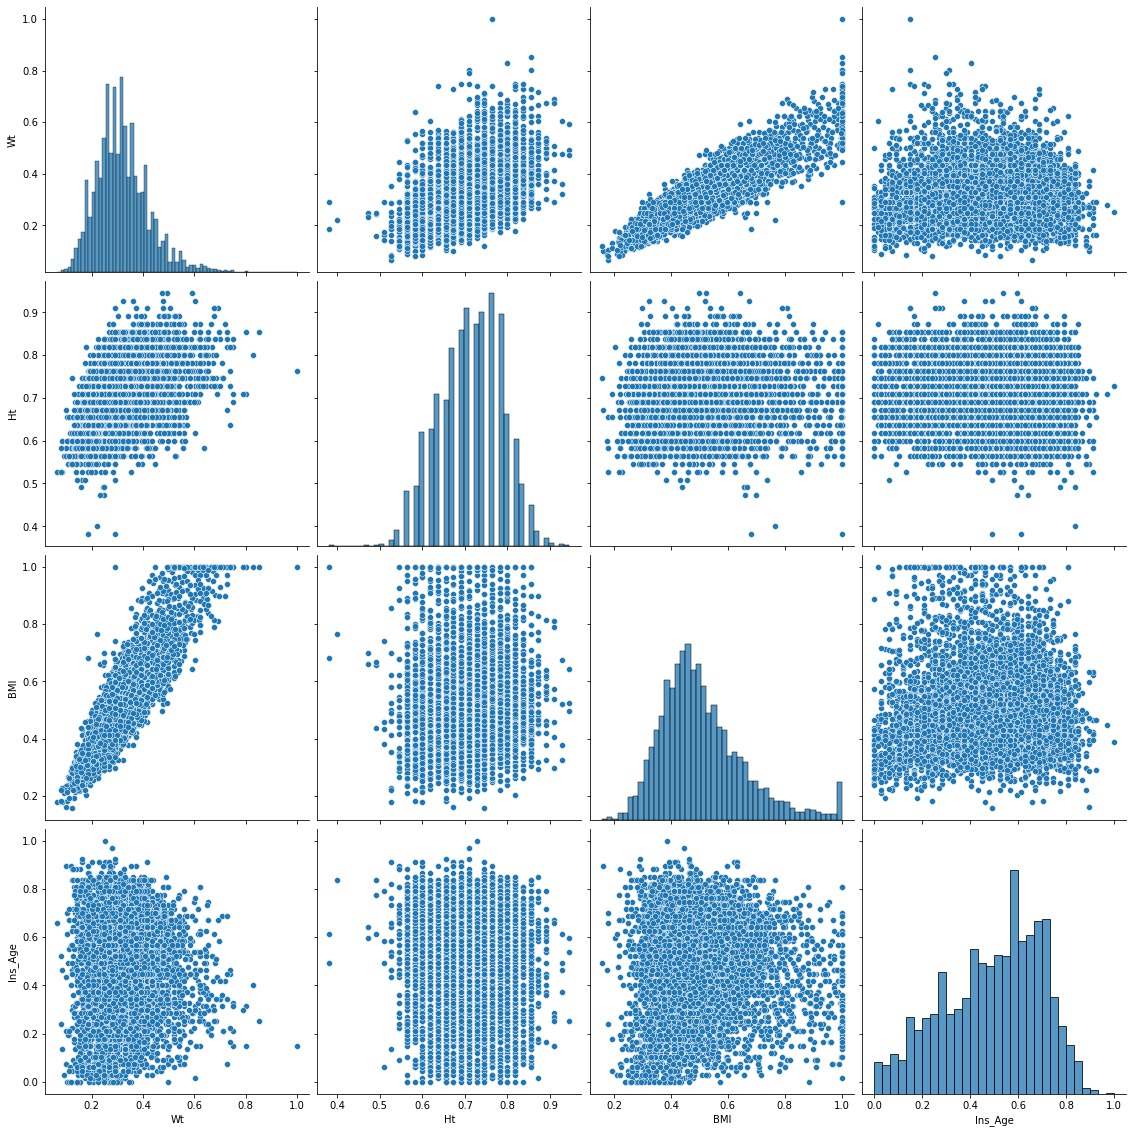

In [45]:
data = pd.DataFrame(train[train['Response'] == 1],columns=['Wt','Ht','BMI','Ins_Age'])
sns.pairplot(data,height=4)
del data

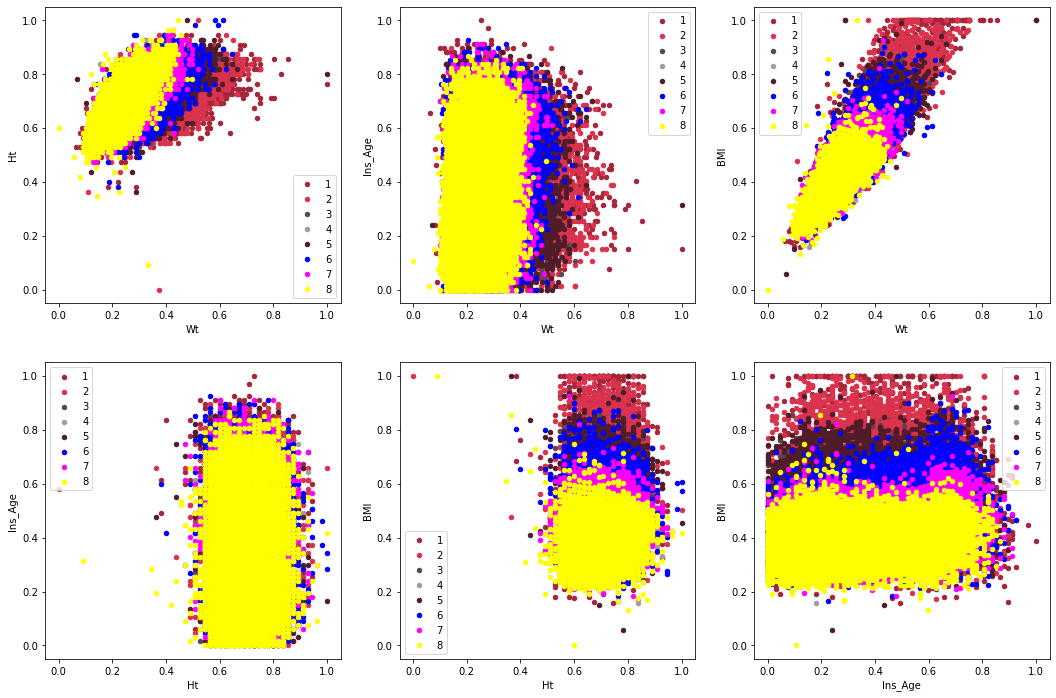

In [48]:
columns_groups = [['Wt','Ht'],['Wt','Ins_Age'],['Wt','BMI'],
                  ['Ht','Ins_Age'],['Ht','BMI'],['Ins_Age','BMI']]

colors = ["#A62639", "#DB324D", "#56494E", "#A29C9B", "#511C29",
         "#0000FF", "#FF00FF", "#FFFF00", "#00FFFF", "#00FF00"]

fig = plt.figure(figsize=(18,12))

i = 1
for c in columns_groups:
    data = pd.DataFrame(train,columns=c.append('Response'))
    legend = []
    area = fig.add_subplot(2,3,i)
    for response in range(1,9):
        group = data[data['Response'] == response].plot.scatter(x=c[0],y=c[1],ax=area,c=colors[response-1])
        legend.append(response)
    area.legend(legend)
    i += 1
    del data
        